<h1 style='text-align:center'><strong>Automatic License Plate Recognition</strong></h1>

Dataset <a href="https://ai.stanford.edu/~jkrause/cars/car_dataset.html">Stanford Cars</a><br>
<i>"The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe"</i>

## Table of Contents

* [1. Pre-Processing](#chapter2)
    * [Data Preparation](#section_2_1)
    * [Image Filtering and Detection Pre-Processing](#section_2_2)
    * [Poor Illumination](#section_2_3)
    * [Environmental Handling: Rain and Fog](#section_2_4)
* [2. License Plate Localization](#chapter3)
* [3. Optimal Character Recognition](#chapter4)
* [4. Conclusion](#chapter5)


<a id="chapter2" name="chapter2">Chapter 2</a> 

<h2 style="text-align:center">Pre-Processing</h2>

In [1]:
#============================ Personal Helper Modules
import engine.environment as en
import engine.license_detection as ld

#============================ Libraries
import skimage.io as io
import cv2
import matplotlib.pyplot as plt
import imutils
import warnings
import pytesseract
import numpy as np
from IPython.display import clear_output
%matplotlib inline 
warnings.filterwarnings('ignore')
path = "images/{}"

<a id="section_2_1" name="section_2_1">Section 2.1</a>

<h4 style="color:lightcoral"><strong>Data Preparation</strong></h4>

> Read dataset 

> Convert image to grayscale 

> Blur the grayscale image

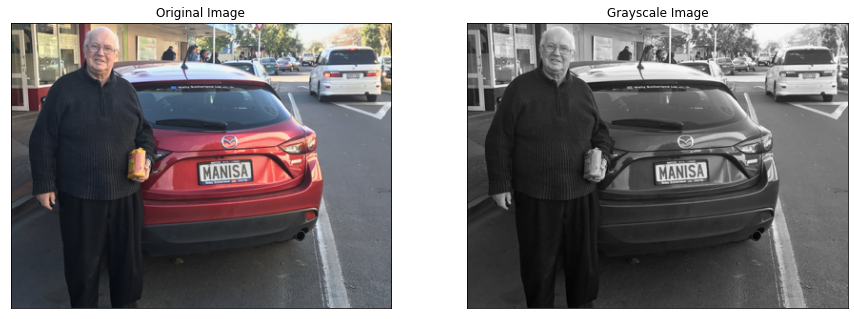

In [58]:

img = io.imread(path.format("Cars32.png"))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
min_aspect_ratio = 2;max_aspect_ratio = 8
en.plot_images(img,gray,title1="Original Image",title2="Grayscale Image")

In [59]:
def perform_hough_transform(): # skew-detection
    pass

def fix_foggy_condition(): # Fix foggy condition 
    pass

def fix_rain_condition():
    pass
def fix_hoover_condition(): # BMW are confused because of their ventilations
    pass

Morphological Operation: No License Plate Detected
Attempt License Plate Detection Using Canny Edge Detection .....
License Plate Detection Using Canny Edge Detection Operation: License Plate Detected


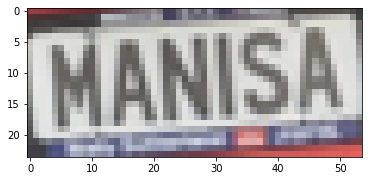

In [60]:
morphological_image = en.morphological_preprocessing(gray)
morphological_contours = ld.find_license_plate_contours(morphological_image)
plate,found,__ = ld.find_license_plate(img,morphological_contours,min_aspect_ratio=min_aspect_ratio,max_aspect_ratio=max_aspect_ratio,verbose=False)


<a id="section_2_2" name="section_2_2">Section 2.2</a>

<a id="section_2_3" name="section_2_3">Section 2.3</a>

<a id="section_2_4" name="section_2_4">Section 2.4</a>

<a id="chapter3" name="chapter3">Chapter 3</a> 

<h2 style="text-align:center">License Plate Localization</h2>

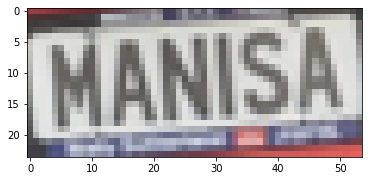

In [62]:
if (found == False) or len(ld.get_license_text(plate)) <= 2:
    print("Morphological Operation: No License Plate Detected")
    print("Attempt License Plate Detection Using Canny Edge Detection .....")
    print("==============================================================")
    blur = cv2.bilateralFilter(gray,11,90,90)
    edges = cv2.Canny(blur,30,200)
    contours = ld.find_license_plate_contours(edges)
    _,found,__ = ld.find_license_plate(img,contours,min_aspect_ratio=min_aspect_ratio,max_aspect_ratio=max_aspect_ratio,verbose=False)#(image,cnts,precision=0.02,min_aspect_ratio=4,max_aspect_ratio=8,closed=True,verbose=False)
    if found == True and len(ld.get_license_text(_)) >=2:
        print("License Plate Detection Using Canny Edge Detection Operation: License Plate Detected")
        plate = _
    
    for pt in __:
        print("Checking Possible Plates:")
        if len(ld.get_license_text(pt)) >2:
            plate = pt # License Text = '\x0c'
            plt.imshow(plate,cmap='gray')
            break
        
    
    if (found == False) or len(ld.get_license_text(plate)) <= 2:
        print("License Plate Detection Using Canny Edge Detection Operation: No License Plate Detected")
        print("Attempt License Plate Detection Using Canny Edge Detection By Blurring The Canny Edge Image .....")
        print("==============================================================")
        edges_blur = cv2.GaussianBlur(edges,(5,5),0)
        contours = ld.find_license_plate_contours(edges_blur)
        _,found,__ = ld.find_license_plate(img,contours,min_aspect_ratio=min_aspect_ratio,max_aspect_ratio=max_aspect_ratio,verbose=False)
        if found == True and len(ld.get_license_text(_)) > 2:
            plate = _    
        else:
            print("No License Plate")
            
    

plt.imshow(plate,cmap='gray')

<a id="chapter4" name="chapter4">Chapter 4</a> 

<h2 style="text-align:center">Optimal Character Recognition</h2>

In [61]:
print(ld.get_license_text(plate))

MANISA


<a id="chapter5" name="chapter5">chapter5</a> 

<h2 style="text-align:center">Conclusion</h2>

It works relatively well, it cannot detected vehicles that have ventilations such as BMWs. It also struggles to detected license plates that have a black background. Surprisingly, it performs well when the license plate is far from the focal point or not in the center